In [1]:
cog_key = 'fdcc898945dc4537bc059e70fd4fcbd1'
cog_endpoint = 'https://dscool.cognitiveservices.azure.com/'

print('Ready to use cognitive services at {} using key {}'.format(cog_endpoint, cog_key))

Ready to use cognitive services at https://dscool.cognitiveservices.azure.com/ using key fdcc898945dc4537bc059e70fd4fcbd1


In [2]:
!pip install azure-cognitiveservices-vision-face

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


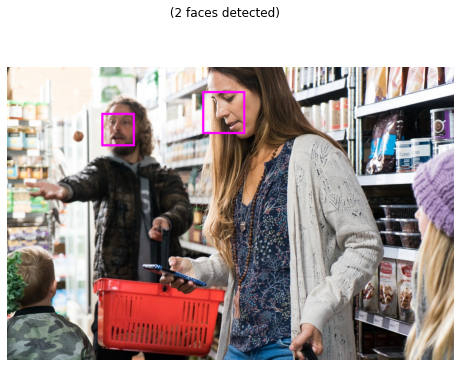

In [3]:
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
import faces
import os

# Create a face detection client.
face_client = FaceClient(cog_endpoint, CognitiveServicesCredentials(cog_key))

# Open an image
image_path = os.path.join('store_cam2.jpg')
image_stream = open(image_path, "rb")

# Detect faces
detected_faces = face_client.face.detect_with_stream(image=image_stream)

# Display the faces (code in python_code/faces.py)
faces.show_faces(image_path, detected_faces)

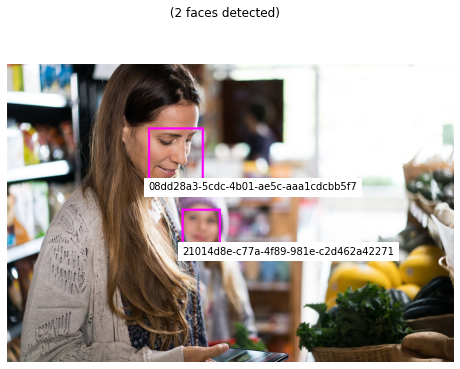

In [4]:
# Open an image
image_path = os.path.join('store_cam3.jpg')
image_stream = open(image_path, "rb")

# Detect faces
detected_faces = face_client.face.detect_with_stream(image=image_stream)

# Display the faces (code in python_code/faces.py)
faces.show_faces(image_path, detected_faces, show_id=True)

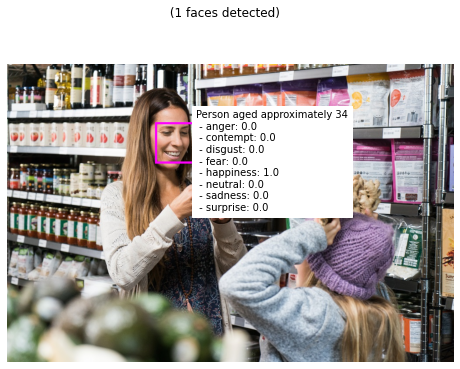

In [5]:
# Open an image
image_path = os.path.join('store_cam1.jpg')
image_stream = open(image_path, "rb")

# Detect faces and specified facial attributes
attributes = ['age', 'emotion']
detected_faces = face_client.face.detect_with_stream(image=image_stream, return_face_attributes=attributes)

# Display the faces and attributes (code in python_code/faces.py)
faces.show_face_attributes(image_path, detected_faces)

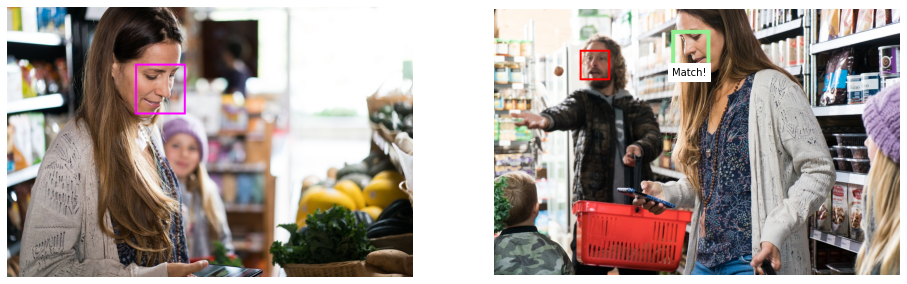

In [6]:
# Get the ID of the first face in image 1
image_1_path = os.path.join('store_cam3.jpg')
image_1_stream = open(image_1_path, "rb")
image_1_faces = face_client.face.detect_with_stream(image=image_1_stream)
face_1 = image_1_faces[0]

# Get the face IDs in a second image
image_2_path = os.path.join('store_cam2.jpg')
image_2_stream = open(image_2_path, "rb")
image_2_faces = face_client.face.detect_with_stream(image=image_2_stream)
image_2_face_ids = list(map(lambda face: face.face_id, image_2_faces))

# Find faces in image 2 that are similar to the one in image 1
similar_faces = face_client.face.find_similar(face_id=face_1.face_id, face_ids=image_2_face_ids)

# Show the face in image 1, and similar faces in image 2(code in python_code/face.py)
faces.show_similar_faces(image_1_path, face_1, image_2_path, image_2_faces, similar_faces)

In [7]:
group_id = 'employee_group_id'
try:
    # Delete group if it already exists
    face_client.person_group.delete(group_id)
except Exception as ex:
    print(ex.message)
finally:
    face_client.person_group.create(group_id, 'employees')
    print ('Group created!')

Group created!


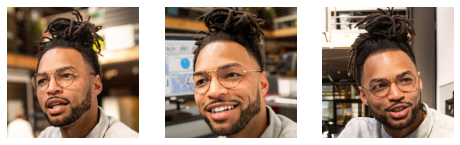

In [8]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Add a person (Wendell) to the group
wendell = face_client.person_group_person.create(group_id, 'Wendell')

# Get photo's of Wendell
folder = os.path.join('wendell')
wendell_pics = os.listdir(folder)

# Register the photos
i = 0
fig = plt.figure(figsize=(8, 8))
for pic in wendell_pics:
    # Add each photo to person in person group
    img_path = os.path.join(folder, pic)
    img_stream = open(img_path, "rb")
    face_client.person_group_person.add_face_from_stream(group_id, wendell.person_id, img_stream)

    # Display each image
    img = Image.open(img_path)
    i +=1
    a=fig.add_subplot(1,len(wendell_pics), i)
    a.axis('off')
    imgplot = plt.imshow(img)
plt.show()